### **ASD Predictions**

**Import Libraries**

In [135]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score,f1_score
from sklearn import preprocessing
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


**Data Acquisition**

In [136]:
df = pd.read_csv('/content/data_csv.csv')

In [137]:
df.head(2)

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,0,0,0,0,0,0,1,1,0,...,Yes,Yes,1,Yes,F,middle eastern,Yes,No,Family Member,No
1,2,1,1,0,0,0,1,1,0,0,...,Yes,Yes,2,Yes,M,White European,Yes,No,Family Member,Yes


**Data Description**

**Details of variables mapping to the Q-Chat-10 screening methods**

Variable in Dataset	Corresponding Q-chat-10-Toddler Features
- A1: Question 1 Answer Binary (0, 1) The answer code of the question based on the screening method used

- A2: Question 2 Answer Binary (0, 1) The answer code of the question based on the screening method used

- A3: Question 3 Answer Binary (0, 1) The answer code of the question based on the screening method used

- A4: Question 4 Answer Binary (0, 1) The answer code of the question based on the screening method used

- A5: Question 5 Answer Binary (0, 1) The answer code of the question based on the screening method used

- A6: Question 6 Answer Binary (0, 1) The answer code of the question based on the screening method used

- A7: Question 7 Answer Binary (0, 1) The answer code of the question based on the screening method used

- A8: Question 8 Answer Binary (0, 1) The answer code of the question based on the screening method used

- A9: Question 9 Answer Binary (0, 1) The answer code of the question based on the screening method used

- A:10 Question 10 Answer Binary (0, 1) The answer code of the question based on the screening method used

- Age Number: 0-18 years 

- Score by Q-chat-10: Number 1-10 (Less that or equal 3 no ASD traits; > 3 ASD traits

- Sex Character: Male or Female

- Ethnicity: String List of common ethnicities in text format

- Born with jaundice: Boolean (yes or no) Whether the case was born with jaundice

- Family member with ASD history: Boolean (yes or no) Whether any immediate family member has a PDD

- Who is completing the test: String Parent, self, caregiver, medical staff, clinician ,etc.

- Why_are_you_taken_the_screening String: Use input textbox
- Speech Delay/Language Disorder
- Learning disorder
- Genetic_Disorders
- Depression
- Global developmental delay/intellectual disability
- Social/Behavioural Issues
- Childhood Autism Rating Scale :1 being normal for your child’s age, 2 for mildly abnormal, 3 for moderately abnormal, and 4 as severely abnormal. 
- Anxiety_disorder



In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 28 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   CASE_NO_PATIENT'S                                   1985 non-null   int64  
 1   A1                                                  1985 non-null   int64  
 2   A2                                                  1985 non-null   int64  
 3   A3                                                  1985 non-null   int64  
 4   A4                                                  1985 non-null   int64  
 5   A5                                                  1985 non-null   int64  
 6   A6                                                  1985 non-null   int64  
 7   A7                                                  1985 non-null   int64  
 8   A8                                                  1985 non-null   int64  
 9

In [139]:
pd.value_counts(df.dtypes)

int64      13
object     13
float64     2
dtype: int64

In [140]:
df.columns

Index(['CASE_NO_PATIENT'S', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'A10_Autism_Spectrum_Quotient', 'Social_Responsiveness_Scale',
       'Age_Years', 'Qchat_10_Score', 'Speech Delay/Language Disorder',
       'Learning disorder', 'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Childhood Autism Rating Scale',
       'Anxiety_disorder', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'ASD_traits'],
      dtype='object')

In [141]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CASE_NO_PATIENT'S,1985.0,NaN,NaN,NaN,993.0,573.164462,1.0,497.0,993.0,1489.0,1985.0
A1,1985.0,NaN,NaN,NaN,0.299244,0.458042,0.0,0.0,0.0,1.0,1.0
A2,1985.0,NaN,NaN,NaN,0.238287,0.426143,0.0,0.0,0.0,0.0,1.0
A3,1985.0,NaN,NaN,NaN,0.213098,0.4096,0.0,0.0,0.0,0.0,1.0
A4,1985.0,NaN,NaN,NaN,0.27204,0.445123,0.0,0.0,0.0,1.0,1.0
A5,1985.0,NaN,NaN,NaN,0.278589,0.448418,0.0,0.0,0.0,1.0,1.0
A6,1985.0,NaN,NaN,NaN,0.306297,0.461071,0.0,0.0,0.0,1.0,1.0
A7,1985.0,NaN,NaN,NaN,0.345088,0.475517,0.0,0.0,0.0,1.0,1.0
A8,1985.0,NaN,NaN,NaN,0.243829,0.429499,0.0,0.0,0.0,0.0,1.0
A9,1985.0,NaN,NaN,NaN,0.25995,0.438717,0.0,0.0,0.0,1.0,1.0


**Observations:**

- There are total 1985 observations with 28 features
- Around 0.5% of missing values present in the dataset , which can be dropped . 
- The dataset is imbalanced i.e., the proportion of the ASD_traits variable "No" is much less compared to "Yes".
- Age column have max of 18 years and min of 1 years .
- Male ratio is more compare to female .

**Data Cleaning**

In [142]:
df.isnull().sum()/df.shape[0]*100

CASE_NO_PATIENT'S                                     0.000000
A1                                                    0.000000
A2                                                    0.000000
A3                                                    0.000000
A4                                                    0.000000
A5                                                    0.000000
A6                                                    0.000000
A7                                                    0.000000
A8                                                    0.000000
A9                                                    0.000000
A10_Autism_Spectrum_Quotient                          0.000000
Social_Responsiveness_Scale                           0.453401
Age_Years                                             0.000000
Qchat_10_Score                                        1.964736
Speech Delay/Language Disorder                        0.000000
Learning disorder                                     0

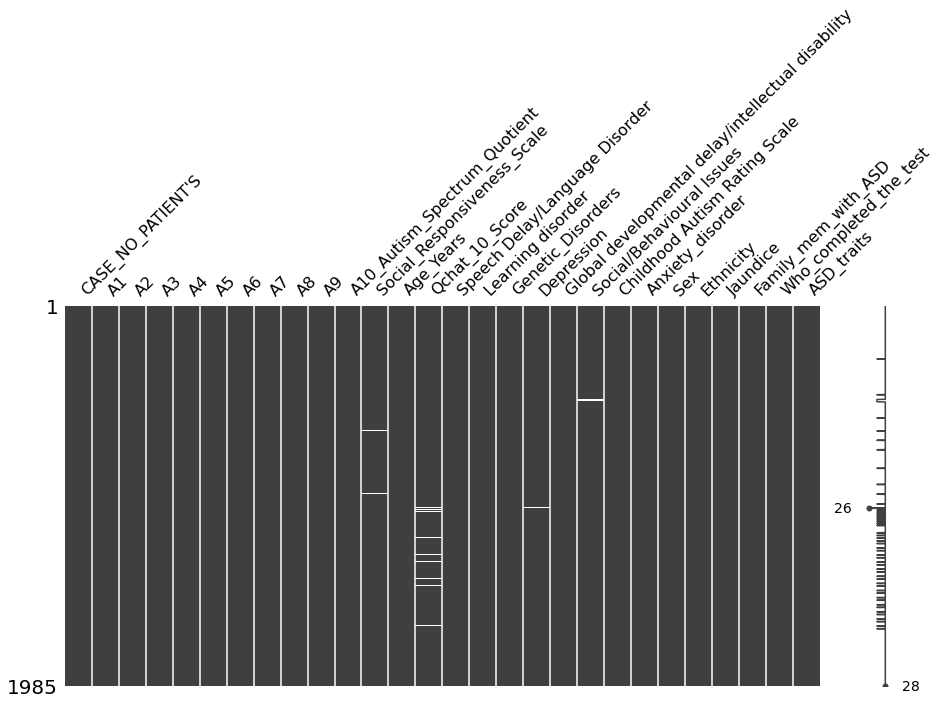

In [143]:
import missingno as mno
mno.matrix(df,figsize=[15,7])
plt.show()

In [144]:
cols = [i for i in df.columns if df[i].isnull().mean() < 0.05 and df[i].isnull().mean() > 0]
cols

['Social_Responsiveness_Scale',
 'Qchat_10_Score',
 'Depression',
 'Social/Behavioural Issues']

In [145]:
df.dropna(axis=0, how='any',inplace=True)

In [146]:
df.isnull().sum()

CASE_NO_PATIENT'S                                     0
A1                                                    0
A2                                                    0
A3                                                    0
A4                                                    0
A5                                                    0
A6                                                    0
A7                                                    0
A8                                                    0
A9                                                    0
A10_Autism_Spectrum_Quotient                          0
Social_Responsiveness_Scale                           0
Age_Years                                             0
Qchat_10_Score                                        0
Speech Delay/Language Disorder                        0
Learning disorder                                     0
Genetic_Disorders                                     0
Depression                                      

In [147]:
# Duplicates
print("Total duplicates: ", df.duplicated().sum())

Total duplicates:  0


In [148]:
# We can drop CASE_NO_PATIENT'S as there is no impact on the analysis
# df.drop("CASE_NO_PATIENT'S" , axis =1,inplace = True)

In [149]:
df = df[df['Age_Years'] < 13]

In [150]:
df['Age_Years'].value_counts()

7     332
9     204
5     138
8     137
4     134
3      95
2      28
12     27
6      24
10     24
1      20
11      6
Name: Age_Years, dtype: int64

In [151]:
df.shape

(1169, 28)

**The dataset is cleaned now and ready for EDA.**

# **Exploratory Data Analysis**

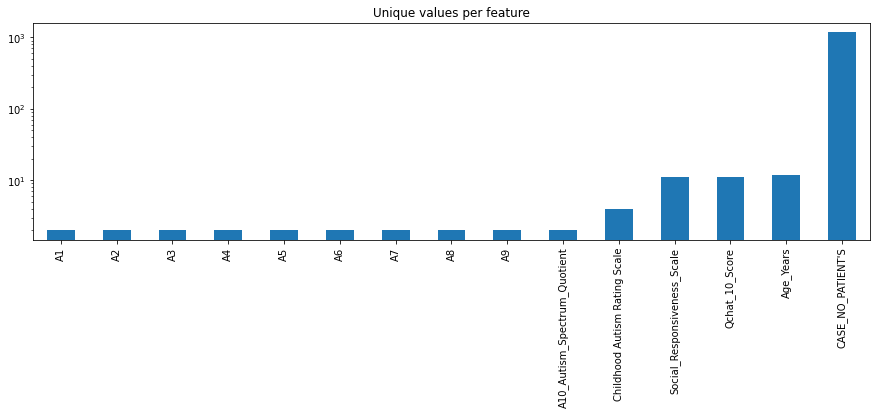

In [152]:
# For each numerical feature compute number of unique entries
unique_values = df.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

In [153]:
df.describe(exclude=['number']).T

,count,unique,top,freq
Speech Delay/Language Disorder,1169,2,Yes,704
Learning disorder,1169,2,Yes,716
Genetic_Disorders,1169,2,Yes,667
Depression,1169,2,Yes,702
Global developmental delay/intellectual disability,1169,2,Yes,703
Social/Behavioural Issues,1169,2,Yes,702
Anxiety_disorder,1169,2,Yes,700
Sex,1169,2,M,867
Ethnicity,1169,16,White European,336
Jaundice,1169,2,Yes,935


Jaundice                                              0.799829
A3                                                    0.762190
Sex                                                   0.741660
A2                                                    0.738238
A8                                                    0.729683
A9                                                    0.728828
A4                                                    0.697177
A5                                                    0.693755
A1                                                    0.678358
A6                                                    0.674936
Family_mem_with_ASD                                   0.656972
A7                                                    0.617622
Learning disorder                                     0.612489
Speech Delay/Language Disorder                        0.602224
Global developmental delay/intellectual disability    0.601369
Depression                                            0

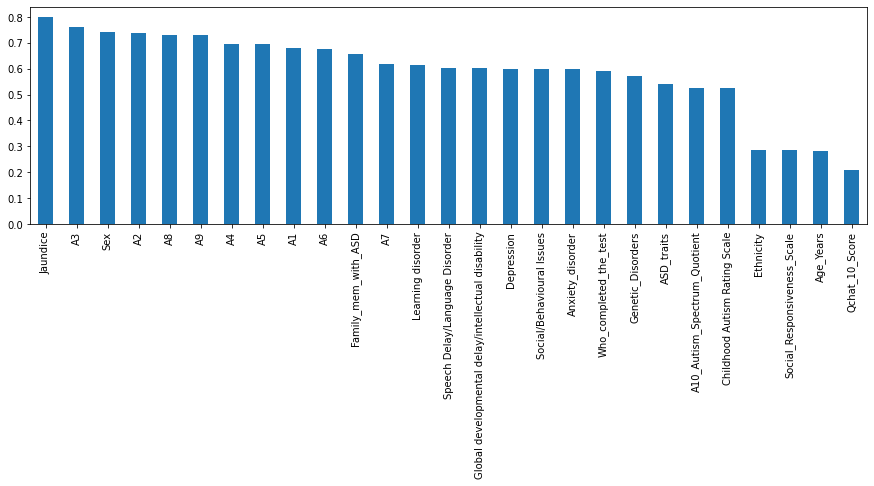

In [154]:
# get most frequent columns 
df1 = df.drop("CASE_NO_PATIENT'S",axis =1)
most_frequent_entry = df1.mode()

# Checks for each entry if it contains the most frequent entry
df_freq = df1.eq(most_frequent_entry.values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)


display(df_freq)

df_freq.plot.bar(figsize=(15, 4));

In [155]:
df[['A10_Autism_Spectrum_Quotient','Qchat_10_Score','ASD_traits']].value_counts()

A10_Autism_Spectrum_Quotient  Qchat_10_Score  ASD_traits
0                             3.0             No            131
1                             6.0             No            126
                                              Yes            91
0                             5.0             Yes            71
                              1.0             No             65
                                              Yes            65
1                             2.0             No             62
                              7.0             Yes            56
                              10.0            Yes            48
                              8.0             Yes            46
                              4.0             Yes            44
                              1.0             No             39
                              9.0             Yes            36
                              5.0             Yes            34
0                             7.0             Y

In [156]:
df.groupby(['ASD_traits'])['Qchat_10_Score'].value_counts()

ASD_traits  Qchat_10_Score
No          3.0               164
            6.0               127
            1.0               104
            2.0                92
            0.0                21
            10.0               16
            9.0                 6
            4.0                 2
            5.0                 2
            7.0                 1
            8.0                 1
Yes         6.0               115
            5.0               105
            7.0                89
            4.0                76
            1.0                66
            8.0                60
            9.0                53
            10.0               51
            0.0                14
            3.0                 4
Name: Qchat_10_Score, dtype: int64

In [157]:
df[df['Qchat_10_Score'] <=3].groupby(['ASD_traits','Qchat_10_Score'])['Age_Years'].count()

ASD_traits  Qchat_10_Score
No          0.0                21
            1.0               104
            2.0                92
            3.0               164
Yes         0.0                14
            1.0                66
            3.0                 4
Name: Age_Years, dtype: int64

**Univatriate Analysis for numarical Data**

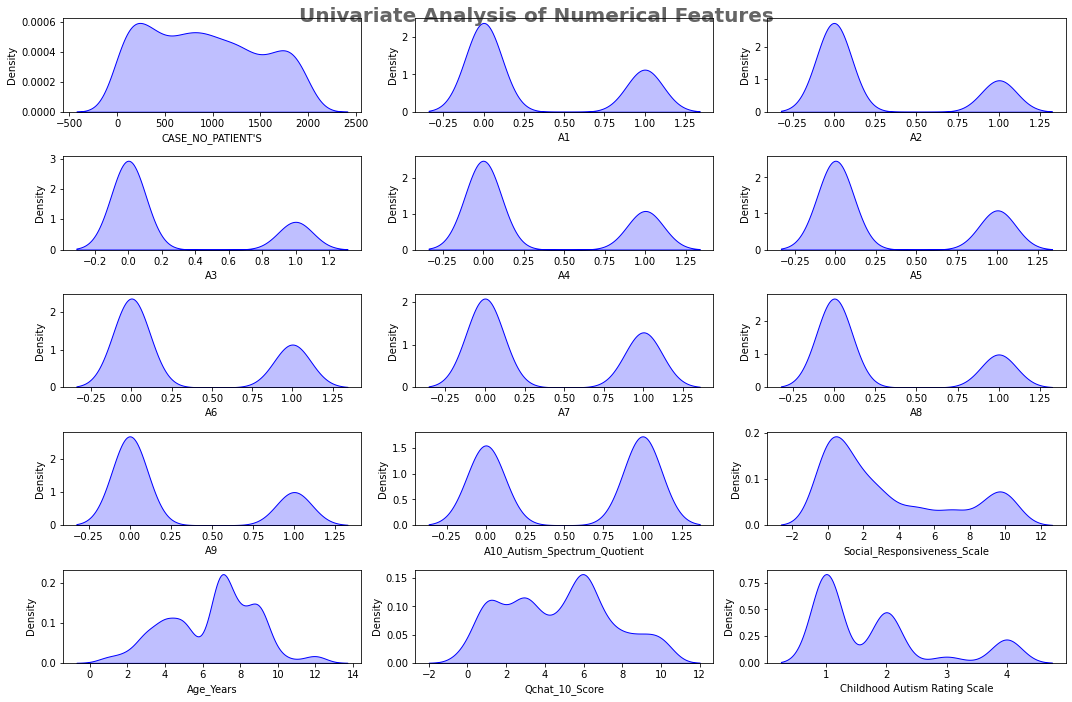

In [158]:

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.6, y=1.)
for i in range(0, len(numeric_features)):
    plt.subplot(8,3,i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

**Univatriate Analysis**

In [159]:
df['Age_Years'].value_counts().sort_index()

1      20
2      28
3      95
4     134
5     138
6      24
7     332
8     137
9     204
10     24
11      6
12     27
Name: Age_Years, dtype: int64

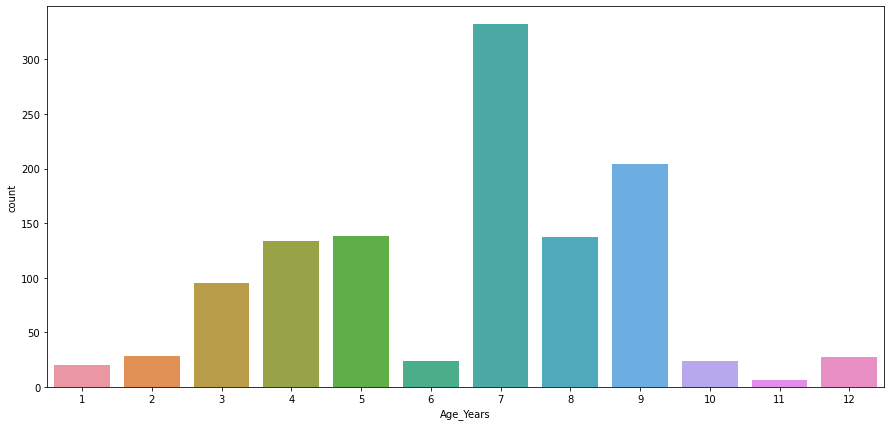

In [160]:
fig = plt.figure(figsize=[15,7])
sns.countplot(x='Age_Years', data = df)

**Most of the children are of 7 years age**

In [161]:
df[df['Age_Years'] < 5].shape

(277, 28)

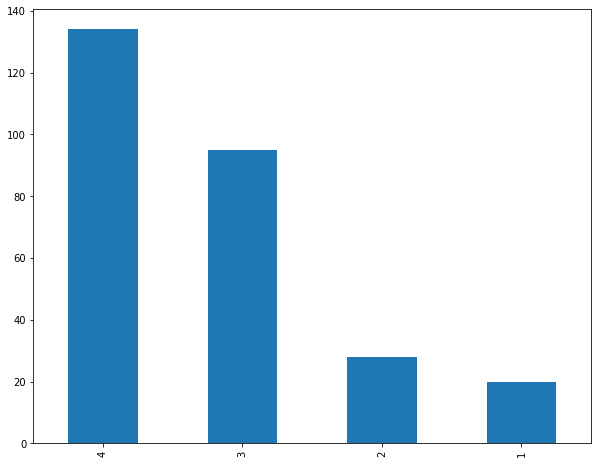

In [162]:
fig=plt.figure(figsize=[10,8])
age_child = df[df['Age_Years'] < 5]
age_child['Age_Years'].value_counts().plot(kind = 'bar')

**In dataset there are around 277 children data present who are of age from 1-4 years and most of the children age is around 4 years**

In [163]:
df[df['Age_Years'] > 4].shape

(892, 28)

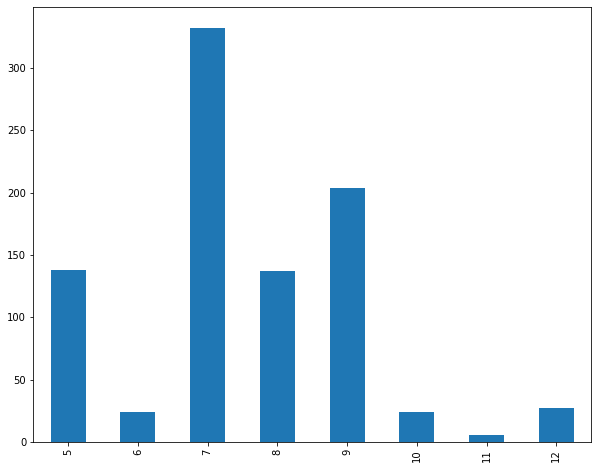

In [164]:
fig=plt.figure(figsize=[10,8])
age_child = df[df['Age_Years'] > 4]
age_child['Age_Years'].value_counts().sort_index().plot(kind = 'bar')

**In dataset there are around 892 children data present who are of age from 5-12 years**

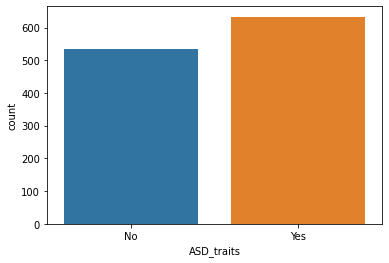

In [165]:
# fig = plt.figure(figsize=[10,7])
sns.countplot(x= df['ASD_traits'])

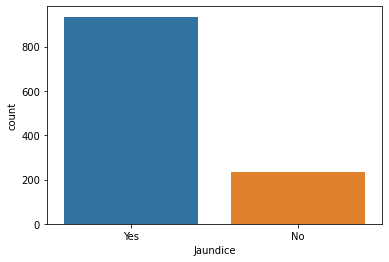

In [166]:
# fig = plt.figure(figsize=[10,7])
sns.countplot(x= df['Jaundice'])


In [167]:
df.columns

Index(['CASE_NO_PATIENT'S', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'A10_Autism_Spectrum_Quotient', 'Social_Responsiveness_Scale',
       'Age_Years', 'Qchat_10_Score', 'Speech Delay/Language Disorder',
       'Learning disorder', 'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Childhood Autism Rating Scale',
       'Anxiety_disorder', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'ASD_traits'],
      dtype='object')

In [168]:
gender = df['Sex'].value_counts()
gender

M    867
F    302
Name: Sex, dtype: int64

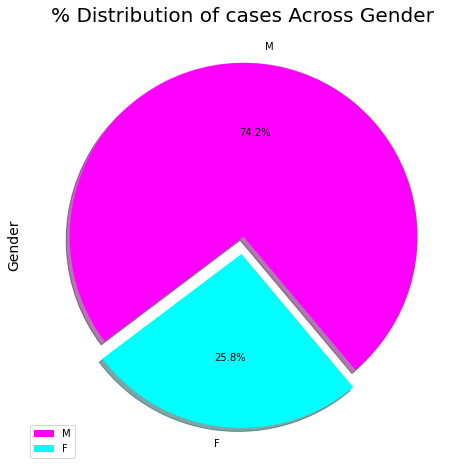

In [169]:
gender.plot(kind ='pie',figsize = [8,8],explode = [0.05,0.05],shadow = True ,autopct= '%3.1f%%',legend=True,cmap='cool_r',startangle=310)

plt.ylabel("Gender",fontsize=14)
plt.title("% Distribution of cases Across Gender",fontsize=20)
plt.show()

**In dataset ,male(74.2%) percentage is more compare to female(25.8%)**

In [170]:
df['Ethnicity'].value_counts()

White European    336
Asian             230
Middle Eastern    206
south asian       115
asian             106
South Asian        32
Others             31
middle eastern     28
Black              28
Hispanic           23
Latino             14
black               7
Mixed               6
PaciFica            5
Native Indian       1
mixed               1
Name: Ethnicity, dtype: int64

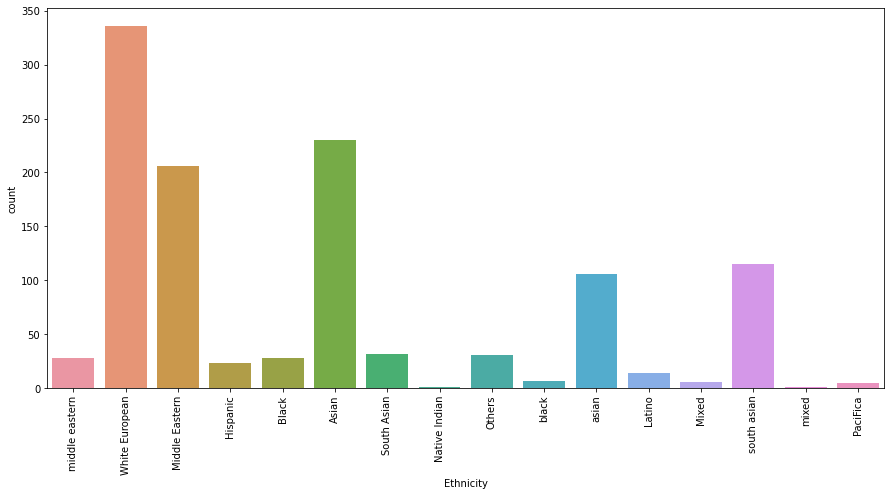

In [171]:
fig=plt.figure(figsize=[15,7])
sns.countplot(x='Ethnicity',data = df)
plt.xticks(rotation =90)
plt.show()
    

**From above plot , we observe that population group of White Erupopean is more compare to others**

In [172]:
df['Who_completed_the_test'].value_counts()

Health Care Professional    693
Family Member               425
Family member                42
School and NGO                6
Self                          3
Name: Who_completed_the_test, dtype: int64

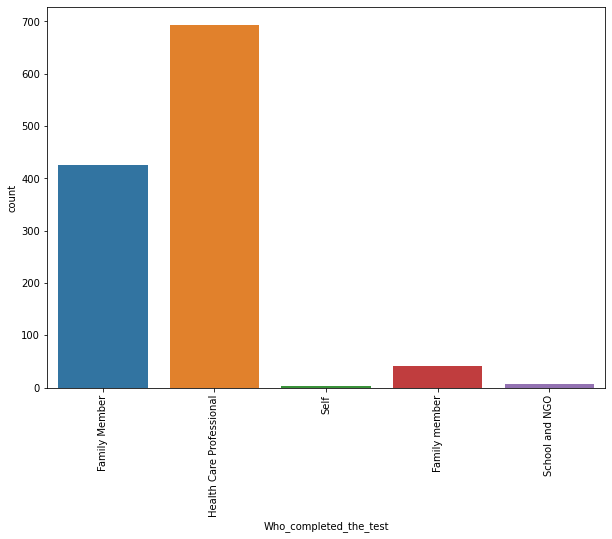

In [173]:
fig=plt.figure(figsize=[10,7])
sns.countplot(x='Who_completed_the_test',data = df)
plt.xticks(rotation =90)
plt.show()

**Around 60% of data, health care professional have completed the test**

**Bivariate Analysis**

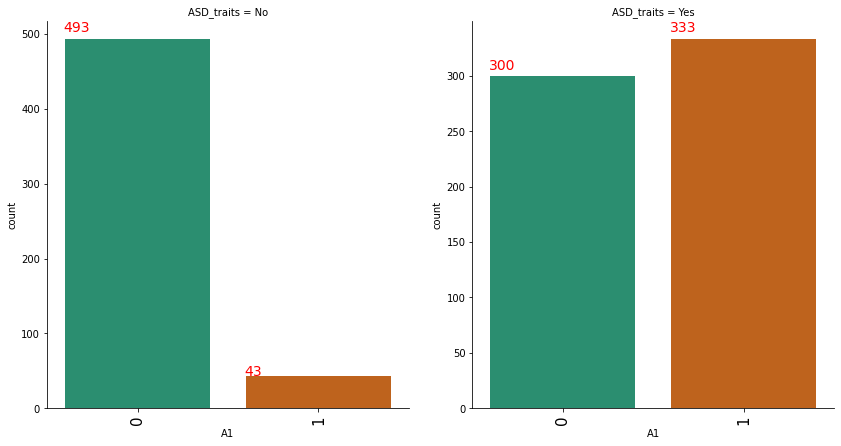

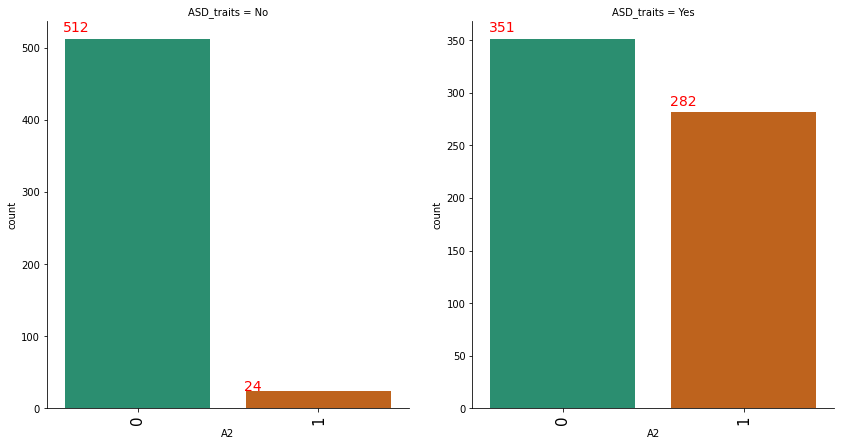

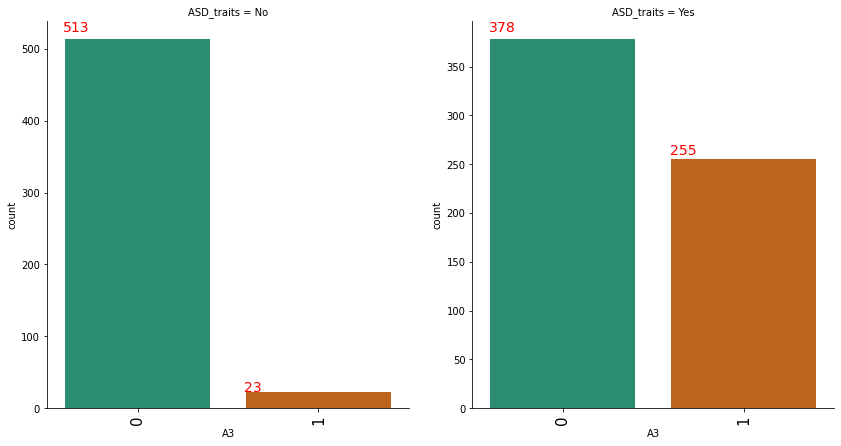

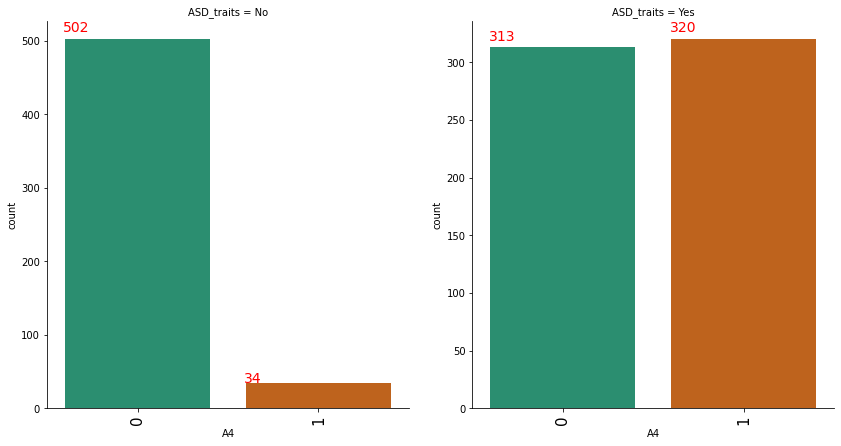

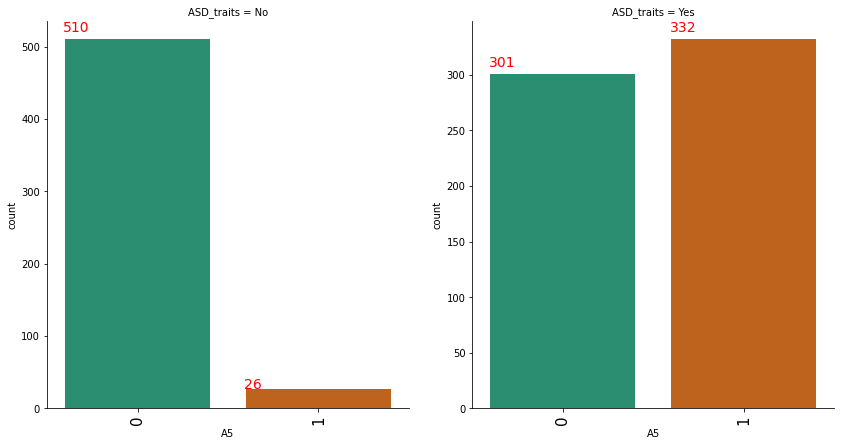

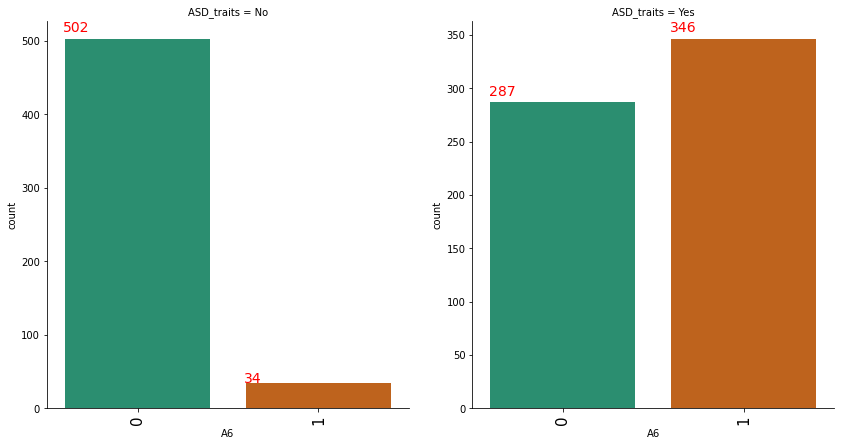

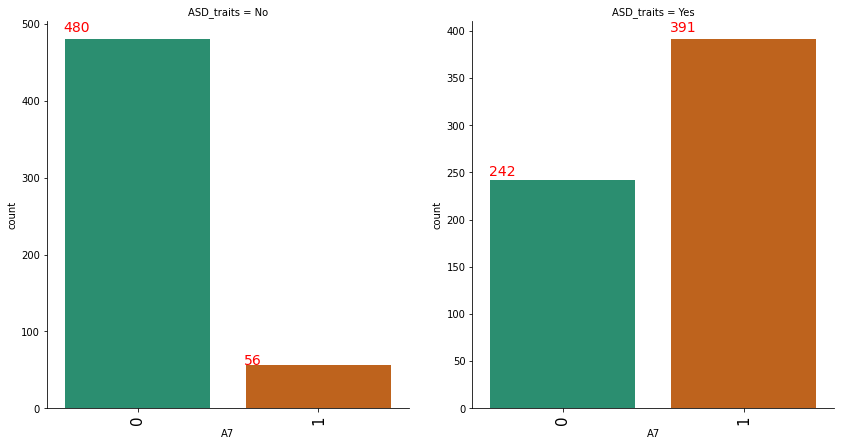

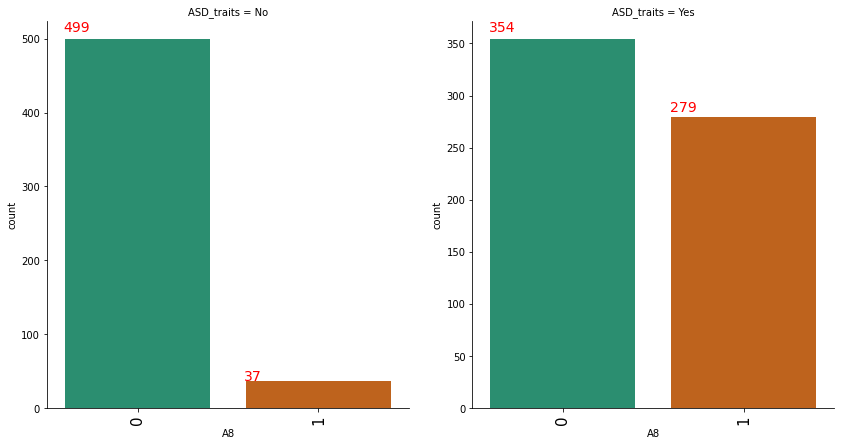

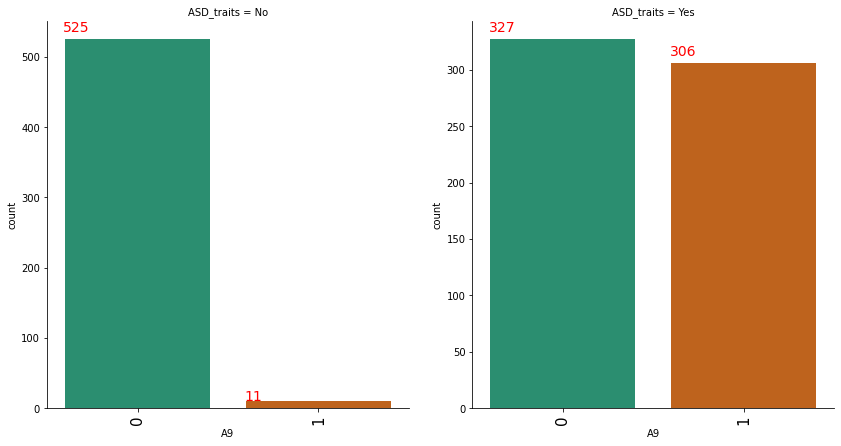

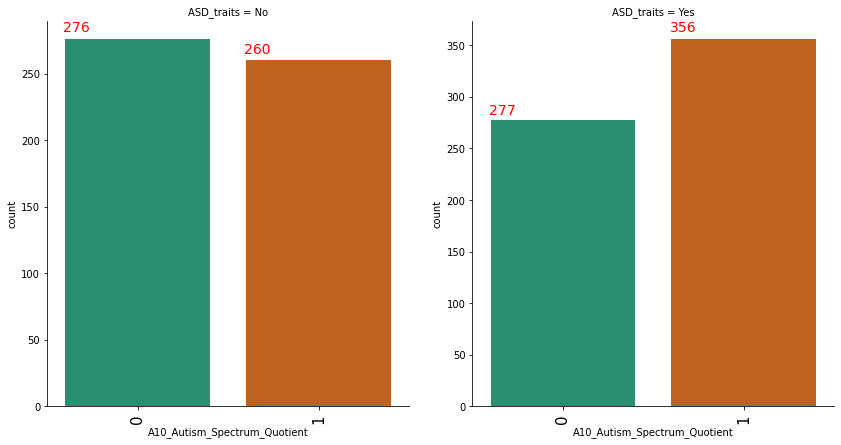

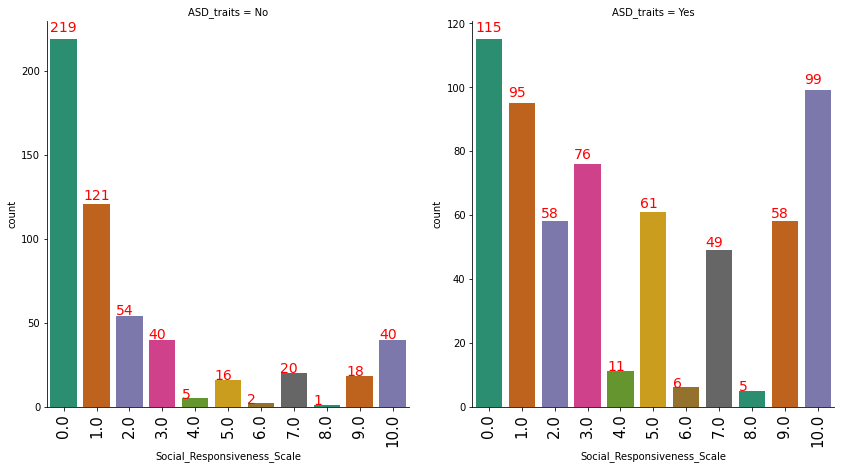

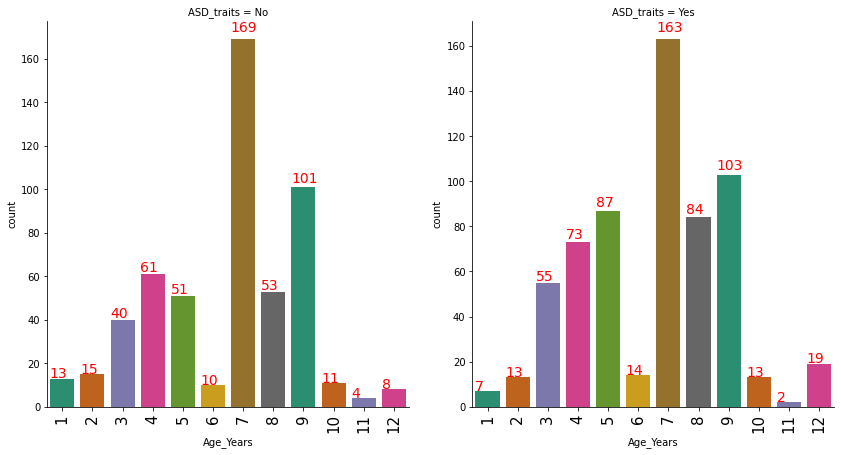

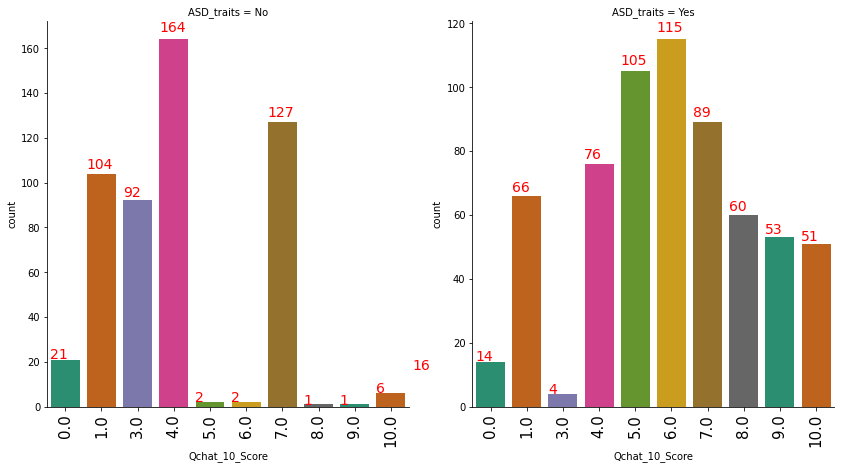

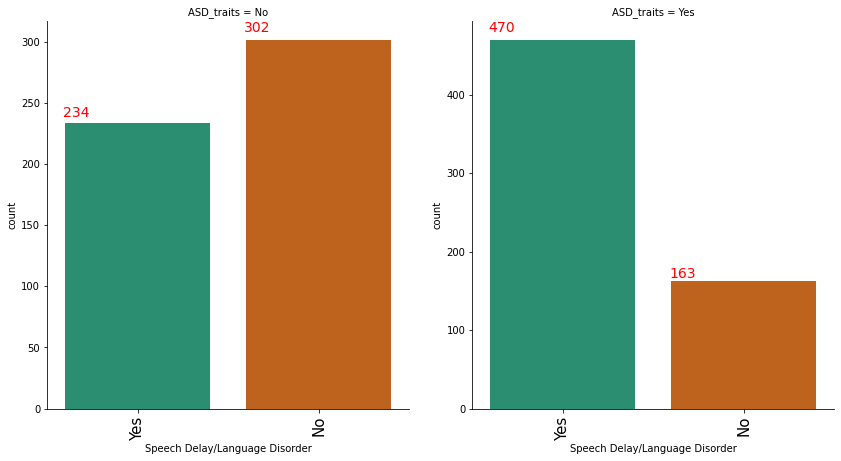

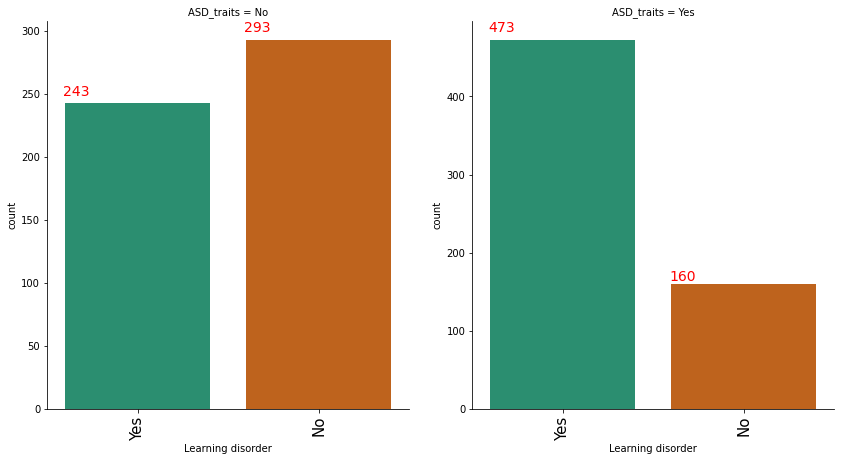

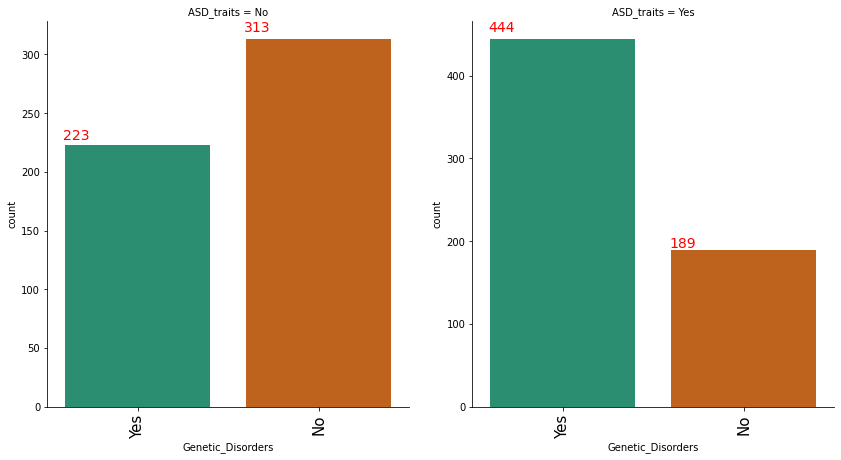

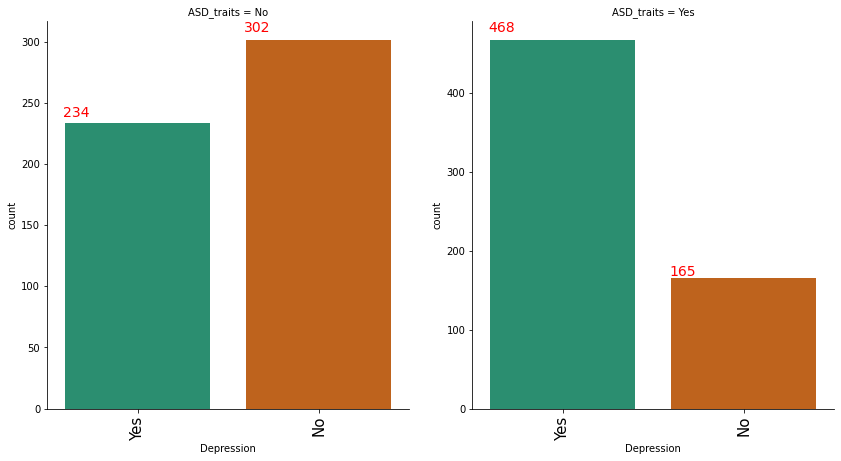

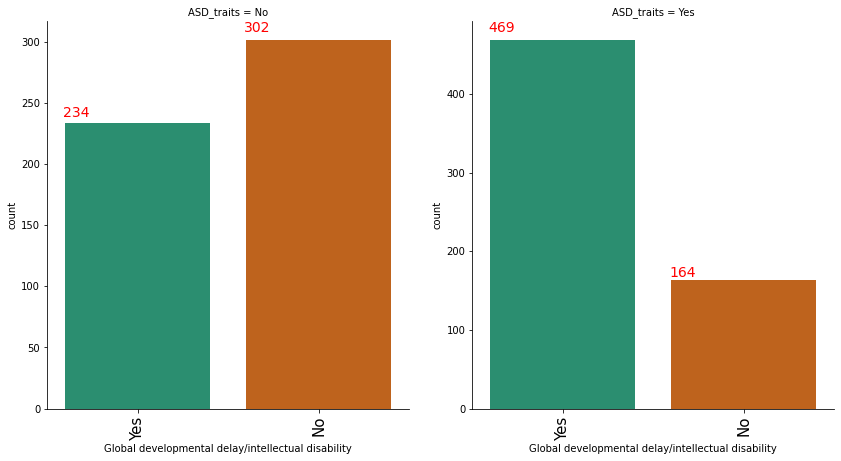

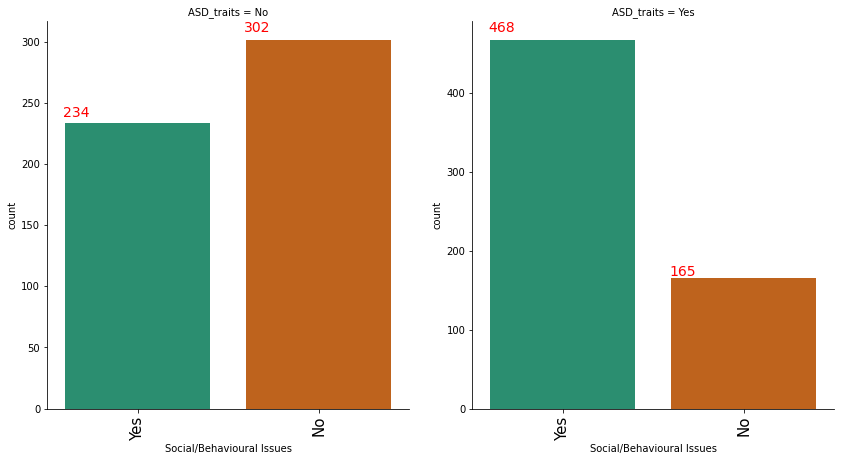

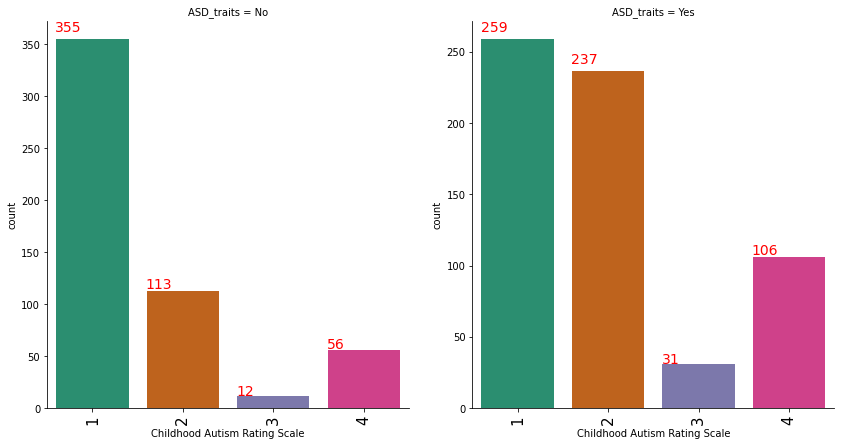

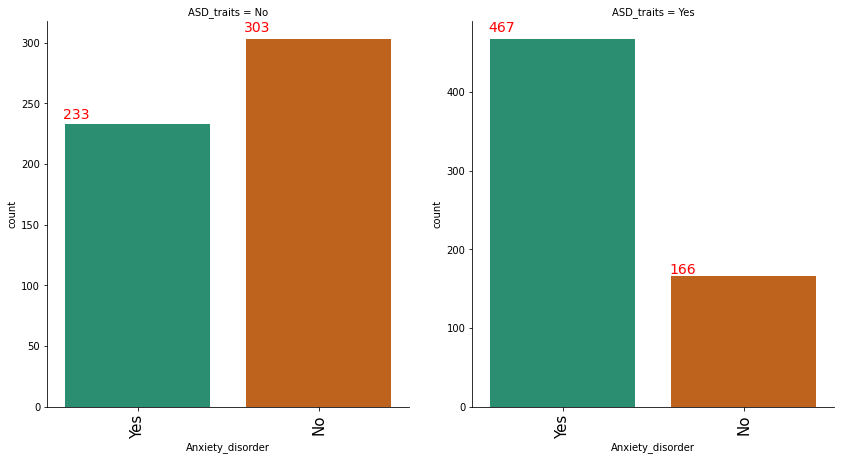

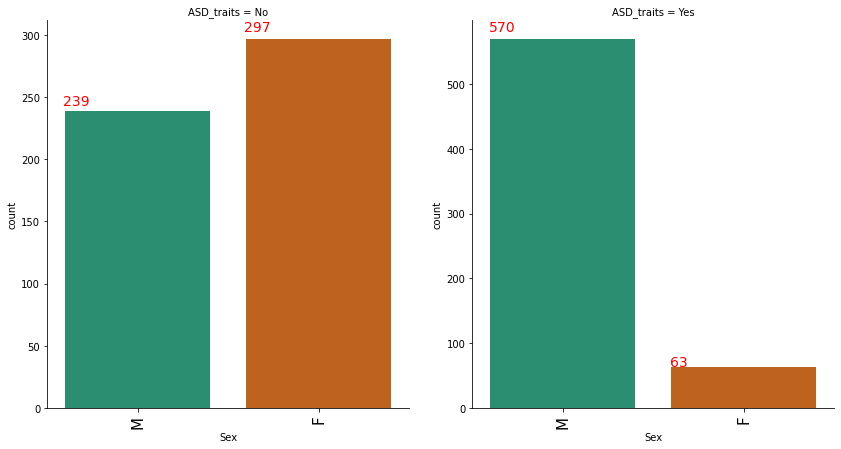

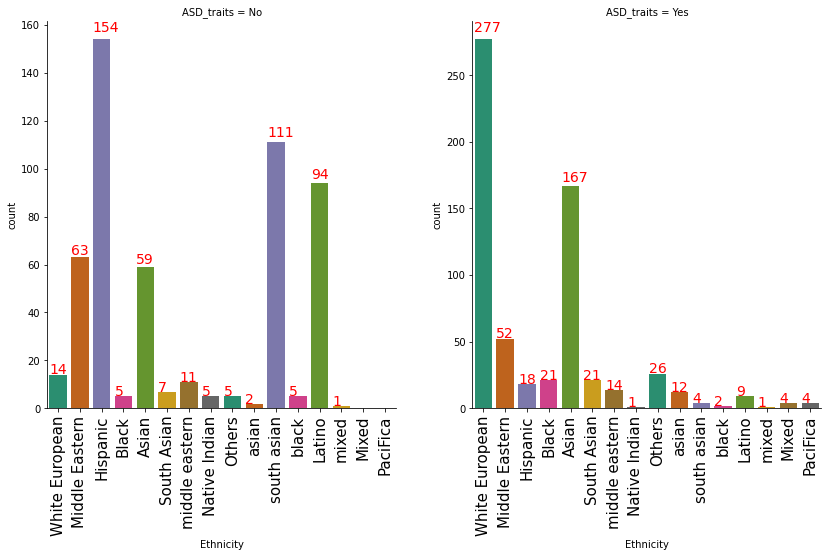

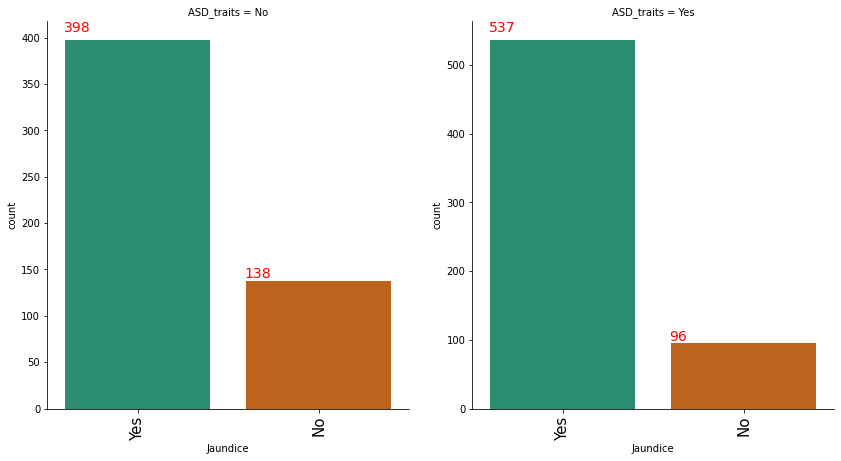

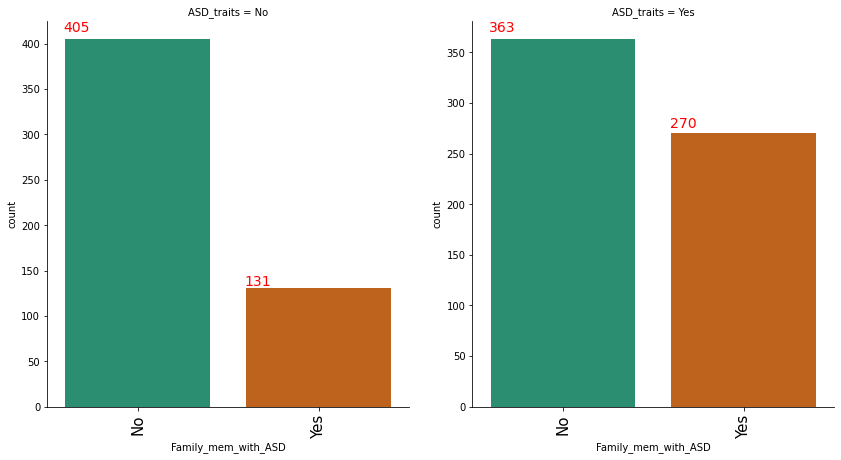

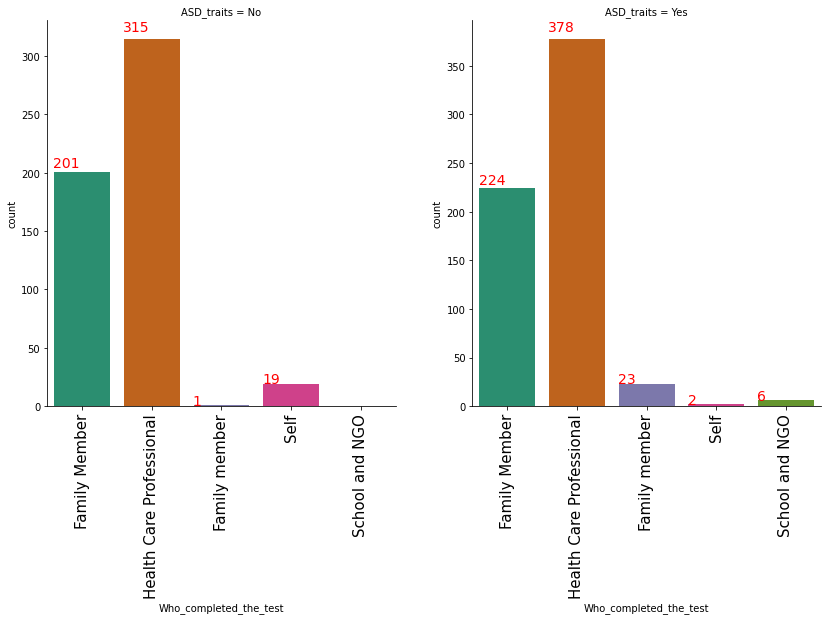

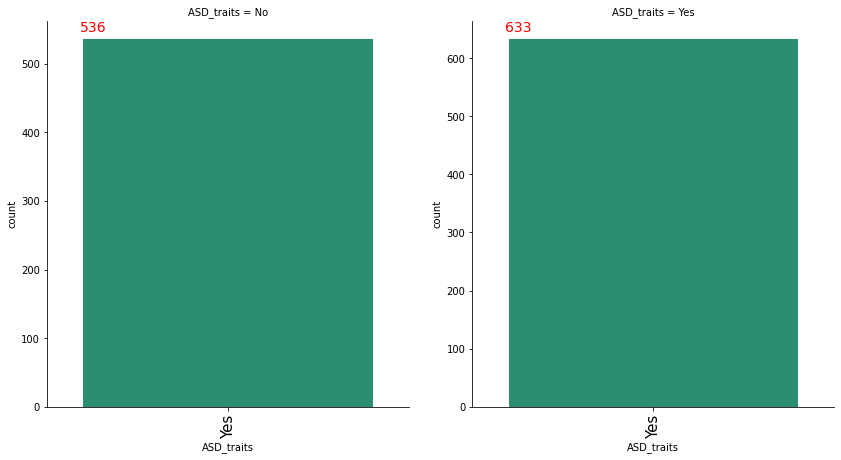

In [174]:
# bivariate analysis with respect to  ASD_trails
for col in df1:
    graph = sns.FacetGrid(df1, col='ASD_traits', size=4, aspect=1.2, sharey=False)
    graph.map(sns.countplot, col, palette = 'Dark2')
    
    ax = graph.facet_axis(0, 1)

     # iterate through the axes containers
    for p in ax.patches:
       ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{}'.format(int(p.get_height())),   #Used to format it K representation
            color='red', 
            rotation='horizontal', 
            size=14)
    ax = graph.facet_axis(0,0)

     # iterate through the axes containers
    for p in ax.patches:
       ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{}'.format(int(p.get_height())),   #Used to format it K representation
            color='red', 
            rotation='horizontal', 
            size=14)
    
    graph.set_xticklabels(fontsize=15,rotation=90)
    graph.fig.set_figwidth(12)
    graph.fig.set_figheight(7)
    plt.show()
    




In [175]:
gen = pd.DataFrame(df.groupby(['Sex','ASD_traits'])["CASE_NO_PATIENT'S"].count())
gen.reset_index(level =[0,1], inplace = True)
gen.rename(columns = {"CASE_NO_PATIENT'S": 'Case_count'},inplace = True)
gen


,Sex,ASD_traits,Case_count
0,F,No,239
1,F,Yes,63
2,M,No,297
3,M,Yes,570


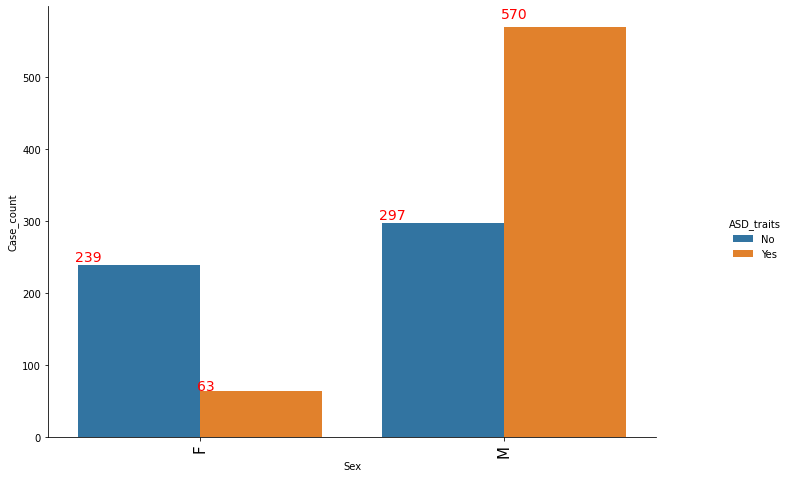

In [176]:
g = sns.catplot(x='Sex' , y = 'Case_count' , hue = 'ASD_traits' , data = gen, kind = 'bar', palette = 'tab10')
ax = g.facet_axis(0, 0)

     # iterate through the axes containers
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{}'.format(int(p.get_height())),   #Used to format it K representation
            color='red', 
            rotation='horizontal', 
            size=14)
g.set_xticklabels(fontsize=15,rotation=90)
g.fig.set_figwidth(12)
g.fig.set_figheight(7)
plt.show()
 

In [177]:
s = pd.DataFrame(df.groupby(['Childhood Autism Rating Scale','Age_Years',])["CASE_NO_PATIENT'S"].count())
s.reset_index(level =[0,1], inplace = True)
s.rename(columns = {"CASE_NO_PATIENT'S": 'Case_count'},inplace = True)
s[:10]

,Childhood Autism Rating Scale,Age_Years,Case_count
0,1,1,4
1,1,2,7
2,1,3,35
3,1,4,65
4,1,5,69
5,1,6,9
6,1,7,230
7,1,8,50
8,1,9,127
9,1,10,11


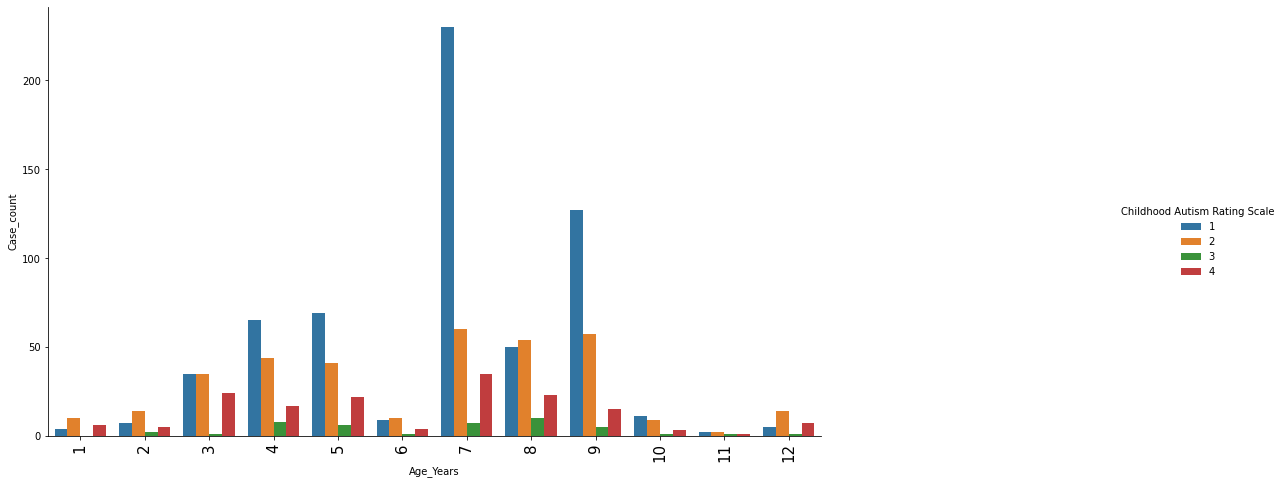

In [178]:
g = sns.catplot(x='Age_Years' , y = 'Case_count' , hue = 'Childhood Autism Rating Scale' , data = s, kind = 'bar', palette = 'tab10')
# ax = g.facet_axis(0, 0)

#      # iterate through the axes containers
# for p in ax.patches:
#     ax.text(p.get_x() - 0.01, 
#             p.get_height() * 1.02, 
#            '{}'.format(int(p.get_height())),   #Used to format it K representation
#             color='red', 
#             rotation='horizontal', 
#             size=14)
g.set_xticklabels(fontsize=15,rotation=90)
g.fig.set_figwidth(20)
g.fig.set_figheight(7)
plt.show()

In [179]:
l= pd.DataFrame(df.groupby(['Learning disorder','Age_Years',])["CASE_NO_PATIENT'S"].count())
l.reset_index(level =[0,1], inplace = True)
l.rename(columns = {"CASE_NO_PATIENT'S": 'Case_count'},inplace = True)
l[:10]

,Learning disorder,Age_Years,Case_count
0,No,2,1
1,No,3,17
2,No,4,49
3,No,5,50
4,No,6,4
5,No,7,196
6,No,8,25
7,No,9,102
8,No,10,6
9,No,11,2


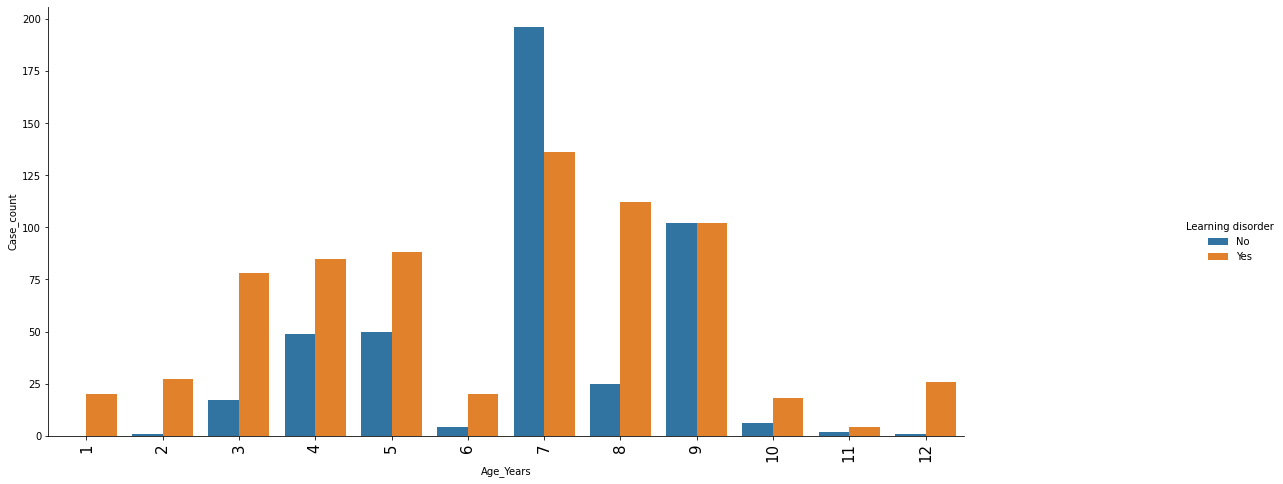

In [180]:
g = sns.catplot(x='Age_Years' , y = 'Case_count' , hue = 'Learning disorder' , data = l, kind = 'bar', palette = 'tab10')
g.set_xticklabels(fontsize=15,rotation=90)
g.fig.set_figwidth(20)
g.fig.set_figheight(7)
plt.show()

In [181]:
sd = pd.DataFrame(df.groupby(['Speech Delay/Language Disorder','Age_Years',])["CASE_NO_PATIENT'S"].count())
sd.reset_index(level =[0,1], inplace = True)
sd.rename(columns = {"CASE_NO_PATIENT'S": 'Case_count'},inplace = True)
sd[:10]


,Speech Delay/Language Disorder,Age_Years,Case_count
0,No,2,1
1,No,3,18
2,No,4,51
3,No,5,52
4,No,6,4
5,No,7,198
6,No,8,26
7,No,9,104
8,No,10,8
9,No,11,2


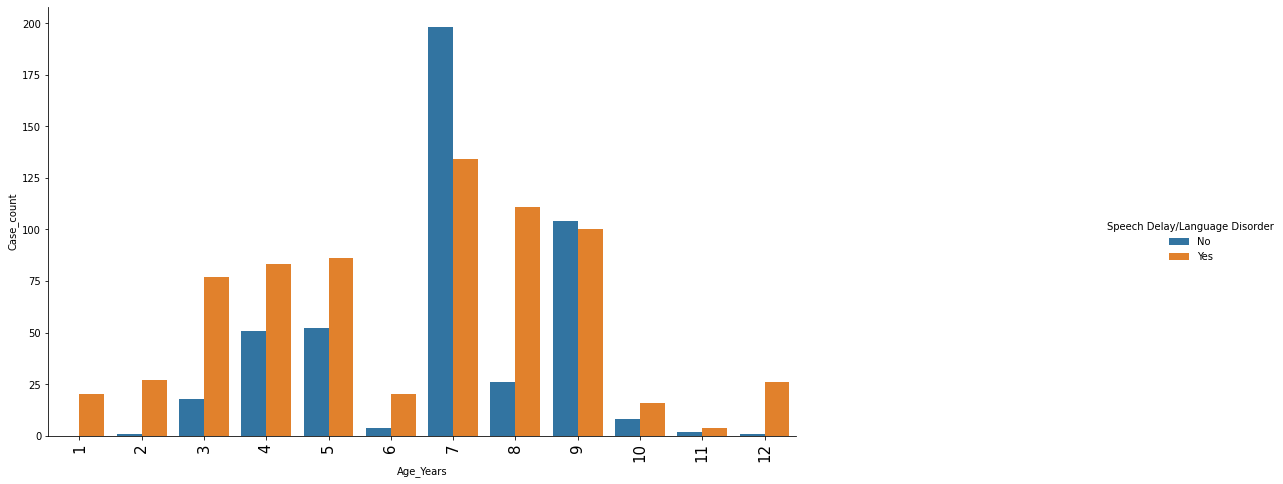

In [182]:
g = sns.catplot(x='Age_Years' , y = 'Case_count' , hue = 'Speech Delay/Language Disorder' , data = sd, kind = 'bar', palette = 'tab10')
g.set_xticklabels(fontsize=15,rotation=90)
g.fig.set_figwidth(20)
g.fig.set_figheight(7)
plt.show()

In [183]:
jd = pd.DataFrame(df.groupby(['Jaundice','Age_Years',])["CASE_NO_PATIENT'S"].count())
jd.reset_index(level =[0,1], inplace = True)
jd.rename(columns = {"CASE_NO_PATIENT'S": 'Case_count'},inplace = True)
jd[:10]

,Jaundice,Age_Years,Case_count
0,No,2,4
1,No,3,2
2,No,4,22
3,No,5,23
4,No,7,149
5,No,8,2
6,No,9,32
7,Yes,1,20
8,Yes,2,24
9,Yes,3,93


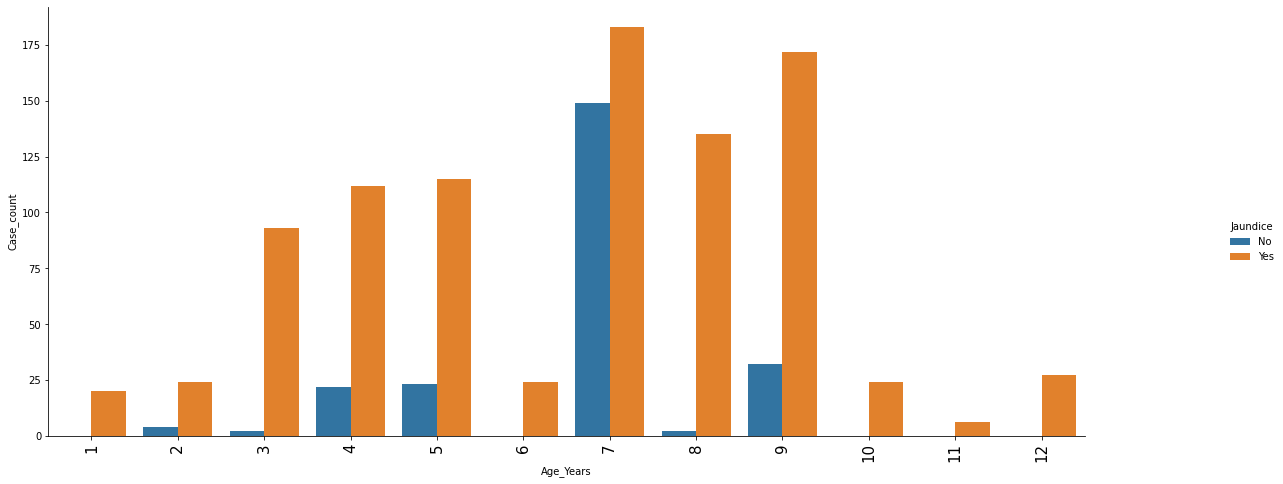

In [184]:
g = sns.catplot(x='Age_Years' , y = 'Case_count' , hue = 'Jaundice' , data = jd, kind = 'bar', palette = 'tab10')
g.set_xticklabels(fontsize=15,rotation=90)
g.fig.set_figwidth(20)
g.fig.set_figheight(7)
plt.show()

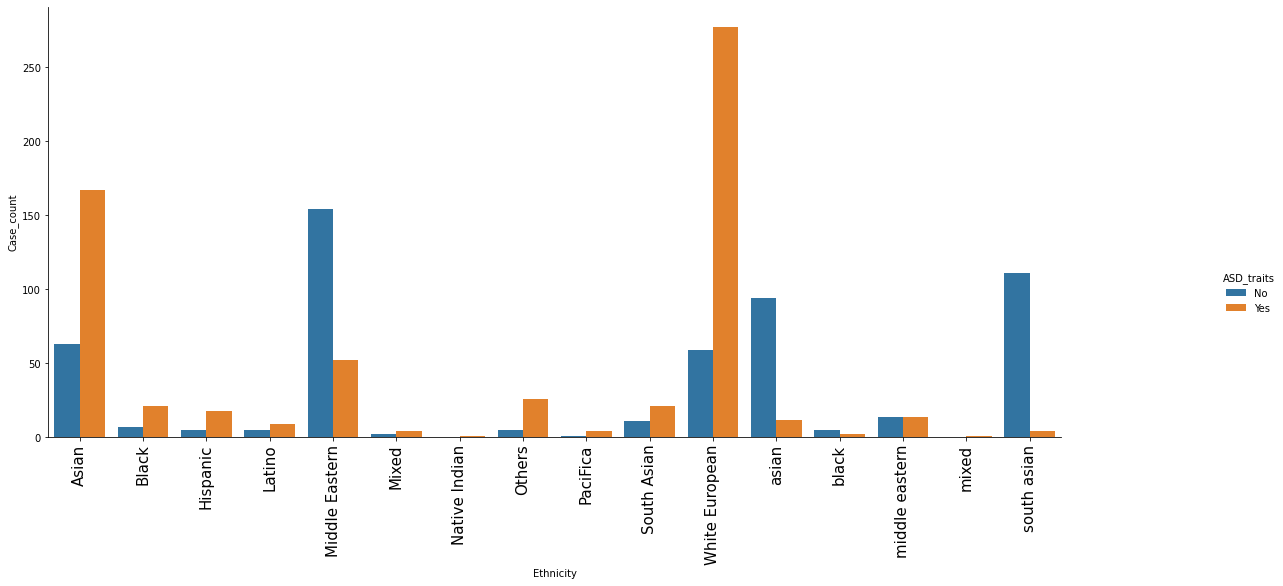

In [185]:
d = pd.DataFrame(df.groupby(['Ethnicity','ASD_traits',])["CASE_NO_PATIENT'S"].count())
d.reset_index(level =[0,1], inplace = True)
d.rename(columns = {"CASE_NO_PATIENT'S": 'Case_count'},inplace = True)
g = sns.catplot(x='Ethnicity' , y = 'Case_count' , hue = 'ASD_traits' , data = d, kind = 'bar', palette = 'tab10')
g.set_xticklabels(fontsize=15,rotation=90)
g.fig.set_figwidth(20)
g.fig.set_figheight(7)
plt.show()

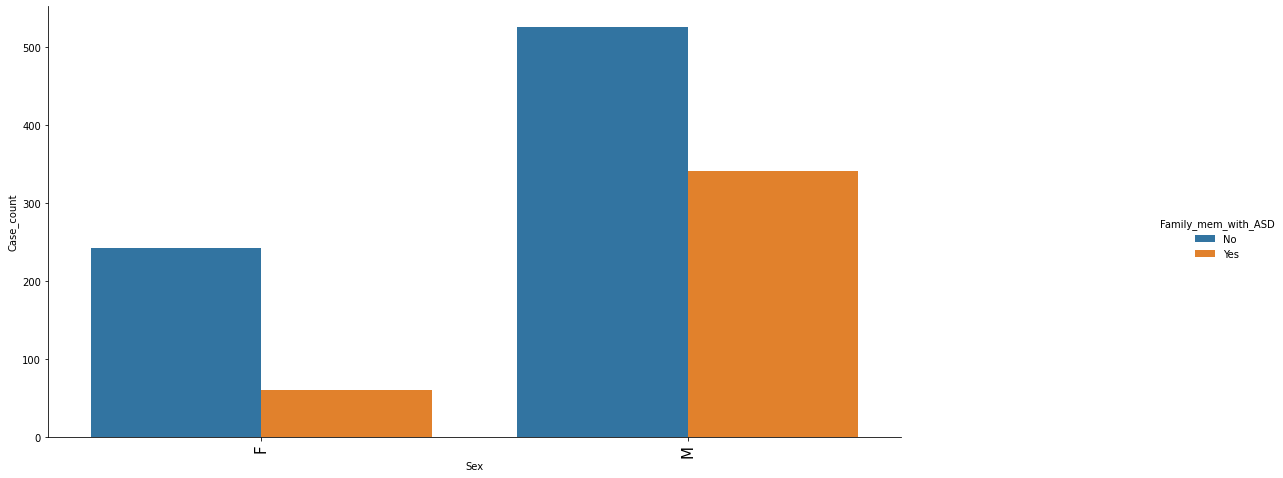

In [186]:
fm = pd.DataFrame(df.groupby(['Family_mem_with_ASD','Sex'])["CASE_NO_PATIENT'S"].count())
fm.reset_index(level =[0,1], inplace = True)
fm.rename(columns = {"CASE_NO_PATIENT'S": 'Case_count'},inplace = True)
g = sns.catplot(hue='Family_mem_with_ASD' , y = 'Case_count' , x = 'Sex' , data = fm, kind = 'bar', palette = 'tab10')
g.set_xticklabels(fontsize=15,rotation=90)
g.fig.set_figwidth(20)
g.fig.set_figheight(7)
plt.show()

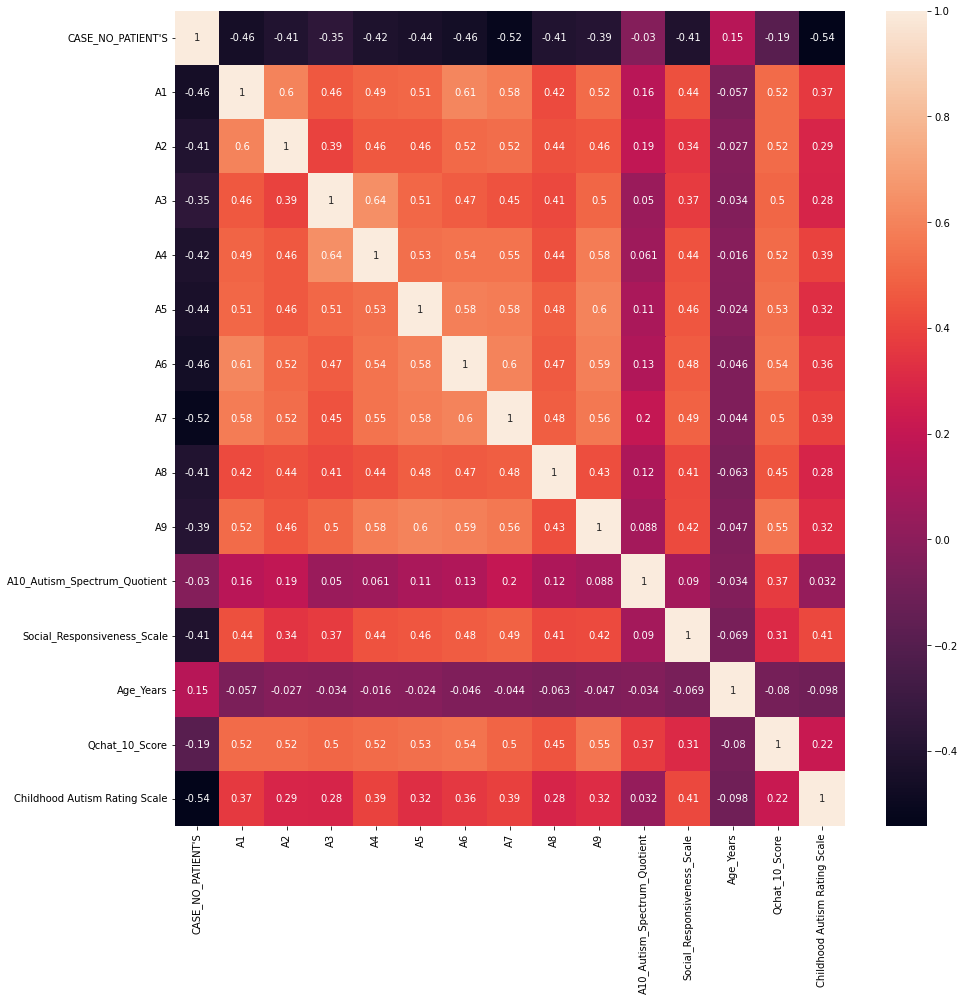

In [187]:
fig = plt.figure(figsize=[15,15])
sns.heatmap(df.corr(),annot = True)